<a href="https://colab.research.google.com/github/GiliardGodoi/bioinfo-sars-cov2-datasets/blob/main/EstudoCaso_1_FeatureImportanceFourierRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from imblearn.metrics import geometric_mean_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
# help(geometric_mean_score)

In [ ]:
import os
from os import path

import pandas as pd
import numpy as np

In [ ]:
from matplotlib import pyplot as plt 
import seaborn as sns

In [ ]:
base_folder = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2"
features_folder = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed"

assert path.exists(features_folder)

folders = os.listdir(features_folder)

folders

['1-covid', '2-other-viruses']

In [ ]:
case_study = path.join(features_folder, folders[0])

print(case_study,'\n')

files = os.listdir(case_study)

files

/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed/1-covid 



['chaos-game-theory_r4.csv',
 'complex-network-k3l10.csv',
 'fourier-class-r5.csv',
 'shannon-entropy-k12.csv']

In [ ]:
file = files[2]

print('loading data from...', file)

frame = pd.read_csv(path.join(case_study, file))

print('Shape ', frame.shape)

frame.head()

loading data from... fourier-class-r5.csv
Shape  (1717, 21)


,nameseq,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
0,MN369046,402.836037,7.782876,1.058454e+07,0.000493,22.403656,2885.711246,64324.948424,64326.136360,1.819023,3.259556,7.782876,15.905053,1.058454e+07,4.137852e+09,12.645497,6.322749,159.680223,0.018425,0.249725,0
1,MN306046,405.718097,7.840941,1.073707e+07,0.000180,22.404719,2897.257602,65018.177312,65019.369464,1.825524,3.240594,7.840941,15.987490,1.073707e+07,4.227518e+09,12.746896,6.373448,160.254565,0.018358,0.249626,0
2,MF542265,405.780337,7.901171,1.073937e+07,0.000624,22.402104,2894.229894,65030.914942,65032.107284,1.851574,3.312756,7.901171,16.066887,1.073937e+07,4.229175e+09,12.754131,6.377066,160.261376,0.018355,0.251174,0
3,KY983587,405.297160,7.788980,1.071249e+07,0.001106,22.399203,2900.071792,64911.033081,64912.224798,1.794982,3.275689,7.788980,16.123806,1.071249e+07,4.213597e+09,12.848117,6.424059,160.156644,0.018372,0.250494,0
4,KY621348,403.955278,7.933557,1.064136e+07,0.000365,22.398519,2891.340716,64588.011362,64589.201124,1.838605,3.274364,7.933557,15.990174,1.064136e+07,4.171765e+09,12.715810,6.357905,159.889015,0.018395,0.251254,0


In [ ]:
rows, columns = frame.shape

X = frame.iloc[:,1:(columns-1)]
y   = frame.iloc[:, -1]

labels = frame['label']

train, test, train_labels, test_labels = train_test_split(X, y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=labels)

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
test =  scaler.transform(test)

print(train.shape)
print(test.shape)

(1201, 19)
(516, 19)


In [ ]:
model = RandomForestClassifier(random_state=63, n_estimators=100)

model.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=63, verbose=0,
                       warm_start=False)

In [ ]:
predicted = model.predict(test)

In [ ]:
confusion_matrix(test_labels, predicted, labels=[1, 0])

array([[395,   0],
       [  0, 121]])

In [ ]:
geometric_mean_score(test_labels, predicted)

1.0

In [ ]:
model.feature_importances_

array([9.27898303e-03, 6.91036758e-02, 7.94369311e-03, 1.80766188e-04,
       1.52250897e-01, 1.94468970e-01, 4.71411575e-03, 1.43769520e-02,
       3.07888882e-02, 7.13706144e-02, 9.37989030e-02, 1.37991552e-01,
       2.57688558e-02, 1.56234794e-02, 3.21505430e-02, 9.71822867e-02,
       2.53732543e-02, 1.76335703e-02, 0.00000000e+00])

In [ ]:
indices = np.argsort(model.feature_importances_)[::-1]

len(indices)

19

In [ ]:
attributes = list(frame.columns)

attributes.remove('nameseq')
attributes.remove('label')

len(attributes)

19

In [ ]:
for i in range(X.shape[1]):
  print(i+1, attributes[indices[i]], indices[i], model.feature_importances_[indices[i]])
  if i > 10:
    break

1 none_levated_peak 5 0.19446896958823426
2 peak 4 0.15225089740417883
3 percentile75 11 0.13799155187884418
4 semi_interquartile_range 15 0.09718228671613179
5 percentile50 10 0.09379890295352565
6 percentile25 9 0.07137061442156807
7 median 1 0.06910367581910902
8 interquartile_range 14 0.03215054300270159
9 percentile15 8 0.030788888184141605
10 amplitude 12 0.025768855849077246
11 coefficient_of_variation 16 0.025373254292628652
12 skewness 17 0.01763357034734559


Text(0.5, 0, 'Features')

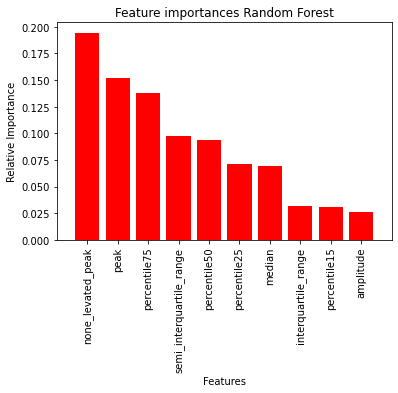

In [ ]:

plt.figure()

col_order = [attributes[i] for i in indices]
feature_importance = model.feature_importances_[indices]

max_indice = 10
interval = slice(max_indice)

plt.title("Feature importances Random Forest")
plt.bar(range(max_indice), feature_importance[interval], color="r", align="center")
plt.xlim([-1, max_indice])
plt.xticks(range(max_indice), col_order[interval], rotation='vertical')

plt.ylabel('Relative Importance')
plt.xlabel('Features')
# plt.show()

--- 

## Test with most importante features

In [ ]:
selected_features = ['none_levated_peak', 'peak', 'label']


In [ ]:
print('loading data from...', file)

frame = pd.read_csv(path.join(case_study, file))[selected_features]

print('Shape ', frame.shape)

frame.head()

loading data from... fourier-class-r5.csv
Shape  (1717, 3)


,none_levated_peak,peak,label
0,2885.711246,22.403656,0
1,2897.257602,22.404719,0
2,2894.229894,22.402104,0
3,2900.071792,22.399203,0
4,2891.340716,22.398519,0


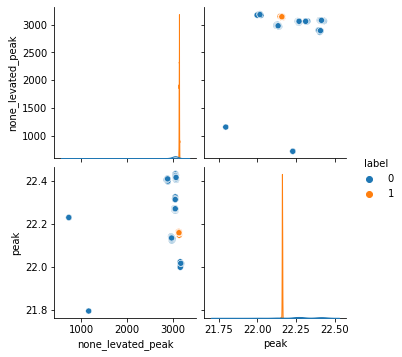

In [ ]:
sns.pairplot(frame, hue='label')

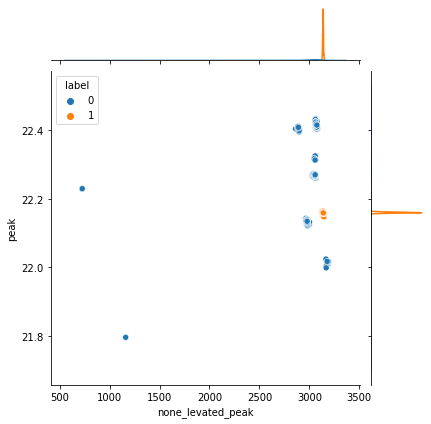

In [ ]:
g = sns.JointGrid(data=frame, x=selected_features[0], y=selected_features[1], hue='label')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

In [ ]:
rows, columns = frame.shape

X = frame.drop(labels=['label'], axis=1)
y   = frame['label']

labels = frame['label']

train, test, train_labels, test_labels = train_test_split(X, y,
                                                          test_size=0.3,
                                                          random_state=99,
                                                          stratify=labels)

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
test =  scaler.transform(test)

print(train.shape)
print(test.shape)

(1201, 2)
(516, 2)


In [ ]:
X.head()

,none_levated_peak,peak
0,2885.711246,22.403656
1,2897.257602,22.404719
2,2894.229894,22.402104
3,2900.071792,22.399203
4,2891.340716,22.398519


In [ ]:
model = RandomForestClassifier(random_state=63, n_estimators=100)

model.fit(train, train_labels)

predicted = model.predict(test)

In [ ]:
confusion_matrix(test_labels, predicted, labels=[0, 1])

array([[121,   0],
       [  0, 395]])

In [ ]:
geometric_mean_score(test_labels, predicted)

1.0